# Homework 11
> Shea Fitzgerald

In [134]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt
from astropy.stats import LombScargle
import scipy as sp
import scipy.stats as stats

In [133]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# cd '/content/drive/My Drive/dsps/HW11'

/content/drive/My Drive/dsps/HW11


In [4]:
first = pd.read_csv("./011400909.rw", header=None, sep=" ")
second = pd.read_csv("./146879345.rw", header=None, sep=" ")
third = pd.read_csv("./277023834.rw", header=None, sep=" ")

In [5]:
print(first.head())
print(second.head())
print(third.head())

             0         1
0  1468.277296 -0.006142
1  1468.278685 -0.006294
2  1468.280074 -0.006214
3  1468.281463 -0.006281
4  1468.282852 -0.006453
             0         1
0  1468.276144  0.030515
1  1468.277532  0.032342
2  1468.278921  0.033998
3  1468.280310  0.034609
4  1468.281699  0.036624
             0         1
0  1325.296126  0.022374
1  1325.297515  0.022118
2  1325.298904  0.026386
3  1325.300293  0.013699
4  1325.301682  0.025005


In [6]:
first.shape

(14827, 2)

## Plotting all 3 time series

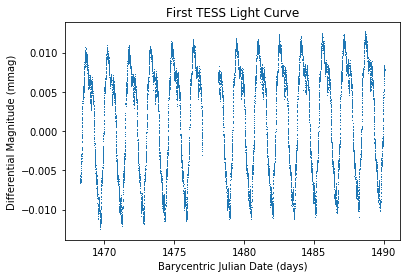

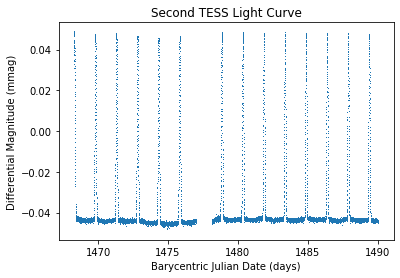

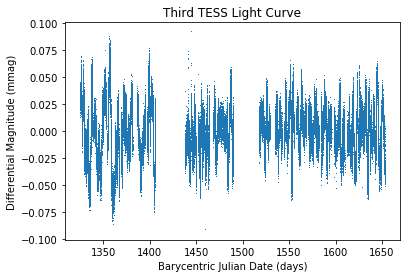

In [135]:
plt.plot(first[0], first[1], ',')
plt.title("First TESS Light Curve")
plt.xlabel("Barycentric Julian Date (days)")
plt.ylabel("Differential Magnitude (mmag)")
plt.show()

plt.plot(second[0], second[1], ',')
plt.title("Second TESS Light Curve")
plt.xlabel("Barycentric Julian Date (days)")
plt.ylabel("Differential Magnitude (mmag)")
plt.show()

plt.plot(third[0], third[1], ',')
plt.title("Third TESS Light Curve")
plt.xlabel("Barycentric Julian Date (days)")
plt.ylabel("Differential Magnitude (mmag)")
plt.show()

**Figure 1** The original data from the time series. The first two appear to be periodic, while the third seems to be cyclic. There seems to be some very short characteristic timescale, but it doesn't look really periodic.

## Computing Lomb-Scargle periodograms

In [11]:
fourier_1 = LombScargle(first[0], first[1], normalization='psd').autopower()
fourier_2 = LombScargle(second[0], second[1], normalization='psd').autopower()
fourier_3 = LombScargle(third[0], third[1], normalization='psd').autopower()

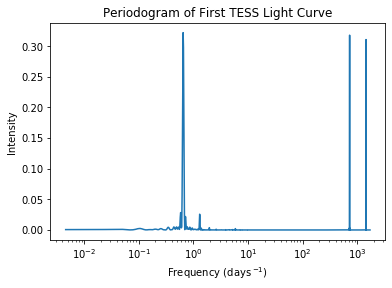

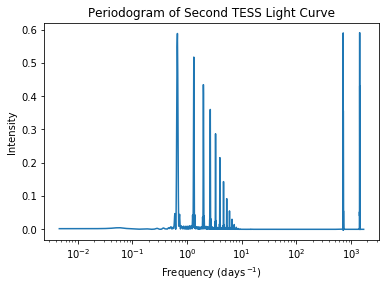

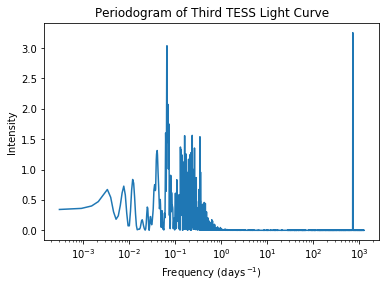

In [136]:
plt.plot(fourier_1[0], fourier_1[1])
plt.xscale('log')
plt.title("Periodogram of First TESS Light Curve")
plt.ylabel("Intensity")
plt.xlabel('Frequency (days$\,^{-1}$)')
# plt.yscale('log')
plt.show()

plt.plot(fourier_2[0], fourier_2[1])
plt.xscale('log')
plt.title("Periodogram of Second TESS Light Curve")
plt.ylabel("Intensity")
plt.xlabel('Frequency (days$\,^{-1}$)')
# plt.yscale('log')
plt.show()

plt.plot(fourier_3[0], fourier_3[1])
plt.xscale('log')
plt.title("Periodogram of Third TESS Light Curve")
plt.ylabel("Intensity")
plt.xlabel('Frequency (days$\,^{-1}$)')
# plt.yscale('log')
plt.show()

<span style="color:red">**-0 pts: why use log as x-axis scales? log scaling is hard to find out period.**</span>

**Figure 2** Fourier transforms of the original data. Each dataset shows a peak (or a few) at very high frequencies, indicating some highly consistent, high frequency noise.

In [27]:
np.amax(fourier_1[1], axis=0)

0.3219224260486552

In [32]:
print("The index of the peak frequency of the first light curve is",
      np.argmax(fourier_1[1]))

The index of the peak frequency of the first light curve is 70


In [37]:
print(np.argmax(fourier_2[1]))
print(np.argmax(fourier_2[1][:150000]))
print("  The previous two indices found were frequencies of some\n\
noise or other uninteresting feature of the data. The actual\n\
index of the peak frequency of the second light curve is",
      np.argmax(fourier_2[1][:78000]))

print()
print(np.argmax(fourier_3[1]))
print('  Similarly, the index of the peak frequency for the third\n\
light curve is', np.argmax(fourier_3[1][:1100000]))

156687
78307
  The previous two indices found were frequencies of some
noise or other uninteresting feature of the data. The actual
index of the peak frequency of the second light curve is 72

1179458
  Similarly, the index of the peak frequency for the third
light curve is 108


<span style="color:red">**-5 pts: wrong periods calculation.**</span>

In [38]:
print('Curve 1 has a peak frequency of', fourier_1[0][70])
print('Curve 2 has a peak frequency of', fourier_2[0][72])
print('Curve 3 has a peak frequency of', fourier_3[0][108])

Curve 1 has a peak frequency of 0.647624927208168
Curve 2 has a peak frequency of 0.665975455655127
Curve 3 has a peak frequency of 0.06624020162405016


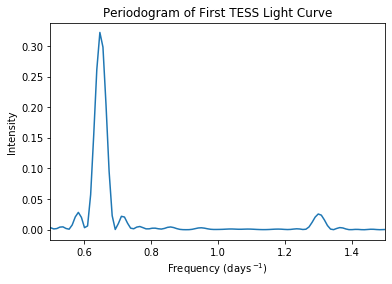

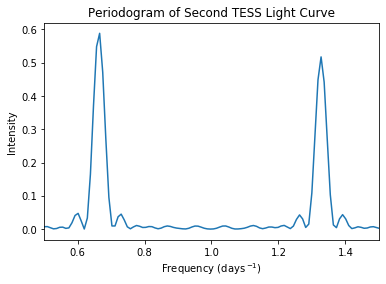

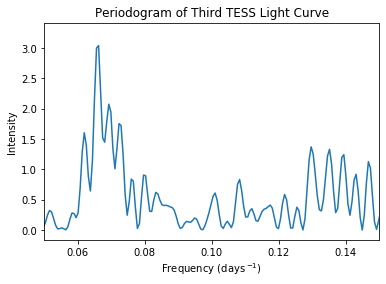

In [137]:
plt.plot(fourier_1[0], fourier_1[1])
plt.xlim(0.5,1.5)
plt.title("Periodogram of First TESS Light Curve")
plt.ylabel("Intensity")
plt.xlabel('Frequency (days$\,^{-1}$)')
# plt.xscale('log')
# plt.yscale('log')
plt.show()

plt.plot(fourier_2[0], fourier_2[1])
plt.xlim(0.5,1.5)
plt.title("Periodogram of Second TESS Light Curve")
plt.ylabel("Intensity")
plt.xlabel('Frequency (days$\,^{-1}$)')
# plt.xscale('log')
# plt.yscale('log')
plt.show()

plt.plot(fourier_3[0], fourier_3[1])
plt.xlim(0.05,0.15)
plt.title("Periodogram of Third TESS Light Curve")
plt.ylabel("Intensity")
plt.xlabel('Frequency (days$\,^{-1}$)')
# plt.xscale('log')
# plt.yscale('log')
plt.show()

**Figure 3** Zoomed in versions of the plots shown in figure 2, highlighting the main peaks. In the first two, the "fundamental" and "first harmonic" frequencies are visible.

## Phase Folding

In [41]:
first_folded = pd.DataFrame()

In [68]:
first.values

array([[ 1.46827730e+03, -6.14166260e-03],
       [ 1.46827869e+03, -6.29425050e-03],
       [ 1.46828007e+03, -6.21414200e-03],
       ...,
       [ 1.49004638e+03,  7.52925870e-03],
       [ 1.49004777e+03,  7.59220120e-03],
       [ 1.49004916e+03,  7.82108300e-03]])

In [44]:
first_folded['phase'] = np.mod(first[0], 1/fourier_1[0][70])
first_folded['dmag'] = first[1]

Text(0, 0.5, 'Differential Magnitude (mmag)')

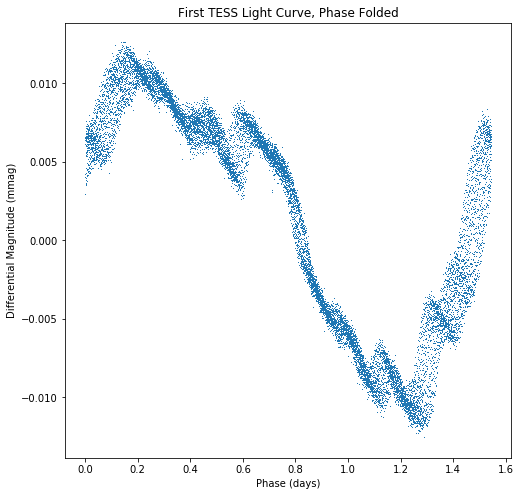

In [138]:
plt.figure(figsize=(8,8))
plt.plot(first_folded.phase, first_folded.dmag, ',')
plt.title("First TESS Light Curve, Phase Folded")
plt.xlabel("Phase (days)")
plt.ylabel("Differential Magnitude (mmag)")

**Figure 4a** Phase folding of the original data, based on the frequency found in figures 2-3.

<span style="color:red">**-2 pts: should scale period into 0-1 scale**</span>

In [78]:
second_folded = pd.DataFrame()

In [93]:
second_folded['phase'] = np.mod(second[0], 1/fourier_2[0][72])
second_folded['dmag'] = second[1]

Text(0, 0.5, 'Differential Magnitude (mmag)')

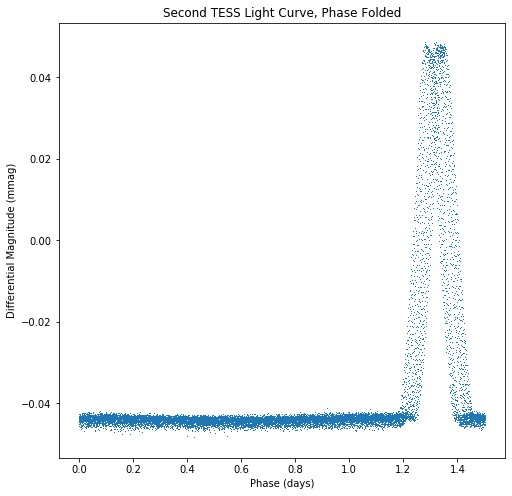

In [139]:
plt.figure(figsize=(8,8))
plt.plot(second_folded.phase, second_folded.dmag, ',')
plt.title("Second TESS Light Curve, Phase Folded")
plt.xlabel("Phase (days)")
plt.ylabel("Differential Magnitude (mmag)")

**Figure 4b** Phase folding of the original data, based on the frequency found in figures 2-3.

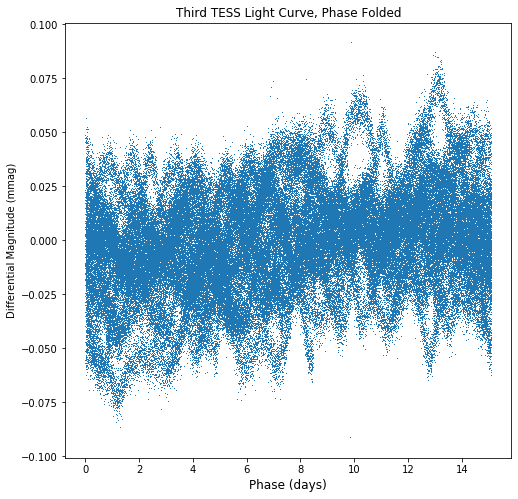

In [141]:
third_folded = pd.DataFrame()

third_folded['phase'] = np.mod(third[0], 1/fourier_3[0][108])
third_folded['dmag'] = third[1]

plt.figure(figsize=(8,8))
plt.plot(third_folded.phase, third_folded.dmag, ',')

plt.title("Third TESS Light Curve, Phase Folded")
plt.xlabel("Phase (days)")
plt.ylabel("Differential Magnitude (mmag)")

plt.show()

**Figure 4c** Phase folding of the original data, based on the frequency found in figures 2-3.

## Binning

In [98]:
means_1, edges_1, binnum_1 = stats.binned_statistic(
    first_folded.phase, first_folded.dmag, bins=20)

In [148]:

means_3, edges_3, binnum_3 = stats.binned_statistic(
    third_folded.phase, third_folded.dmag, bins=20)

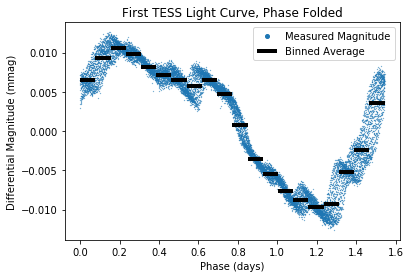

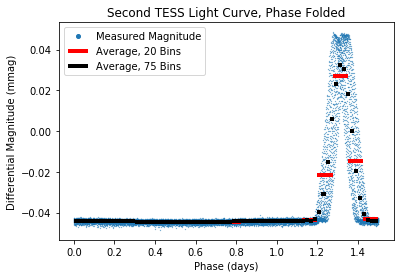

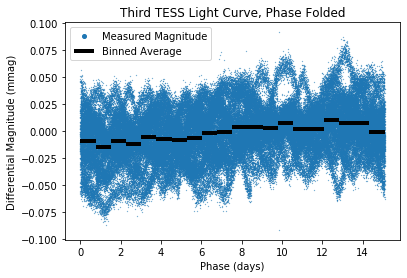

In [152]:
plt.plot(first_folded.phase, first_folded.dmag, '.', ms=0.5, zorder=0,
        label='Measured Magnitude')
plt.hlines(means_1, edges_1[:-1], edges_1[1:], 'k', lw=4, zorder=1,
          label="Binned Average")
plt.legend(markerscale=16)
plt.title("First TESS Light Curve, Phase Folded")
plt.xlabel("Phase (days)")
plt.ylabel("Differential Magnitude (mmag)")
plt.show()

#
means_2, edges_2, binnum_2 = stats.binned_statistic(
    second_folded.phase, second_folded.dmag, bins=20)

plt.plot(second_folded.phase, second_folded.dmag, '.', ms=0.5,
         zorder=0, label='Measured Magnitude')
plt.hlines(means_2, edges_2[:-1], edges_2[1:], 'r', lw=4, zorder=1,
           label="Average, 20 Bins")

means_2, edges_2, binnum_2 = stats.binned_statistic(
    second_folded.phase, second_folded.dmag, bins=75)
plt.hlines(means_2, edges_2[:-1], edges_2[1:], 'k', lw=4, zorder=1,
           label="Average, 75 Bins")

plt.legend(markerscale=16)
plt.title("Second TESS Light Curve, Phase Folded")
plt.xlabel("Phase (days)")
plt.ylabel("Differential Magnitude (mmag)")
plt.show()

#

plt.plot(third_folded.phase, third_folded.dmag, '.', ms=0.5,
         zorder=0, label='Measured Magnitude')
plt.hlines(means_3, edges_3[:-1], edges_3[1:], 'k', lw=4, zorder=1,
           label="Binned Average")
plt.legend(markerscale=16)
plt.title("Third TESS Light Curve, Phase Folded")
plt.xlabel("Phase (days)")
plt.ylabel("Differential Magnitude (mmag)")
plt.show()

**Figure 5** Each of the phase folded curves, separated into 20 bins in the first and third cases, and 75 bins for the second. Having fewer bins for the second curve does not seem appropriate as it is too coarsely grained to show details of the peak.

Binning in the third plot is quite helpful in seeing that there may not be much of a periodic trend.

## Bonus Question

The first two folded light curves (figure 5) show some phase drifting. The period chosen was not exactly the period of the measured phenomenon.

The correct period could be approximated by some variance-minimizing algorithm: Calculate the magnitude variance over each bin over various folding periods near the peak found in the fourier transform, until the period yielding the smallest total variance was found. For the second curve especially, this would require an appropriately small bin size, as a large bin over the correct period would still have large variance due to the large slope of the curve.